In [1]:
import sncosmo
import numpy
import matplotlib.pyplot as plt
import numpy as np

**Here I used the light curve simulation code, sent by Alex. I played with three parameters in the code: nobs (number of observation, kept same for all bands, Alex set it to 40), fluc (used in Poisson distribution of observation days, Alex->4), t1 (Alex->60). I chose various combinations of these three parameters in lsst simulation. The values of these parameters are mentioned in each notebook.**

In [116]:
nobs = 60
t0 = 55000.
fluc=2
obs = numpy.random.poisson(fluc,size=nobs)+1
for i in range(1,nobs):
    obs[i]=obs[i-1]+obs[i]

t1=60
obs= obs + 55000-t1

In [117]:
bands = ('lsstg','lsstr','lssti','lsstz')

In [118]:
model = sncosmo.Model(source='hsiao')
model.set(z=0.4, t0=t0, amplitude=1.e-10)

**For simplicity I first choose two images only**

In [119]:
nimage = 2
dt = np.array([1.1,13.2])#numpy.random.uniform(dtrange[0],dtrange[1],nimage)
mag = np.array([1.8,3.0])#numpy.random.uniform(mrange[0],mrange[1],nimage)

In [120]:
np.random.seed=101
fluxes=[]
noises=[]
Nb=len(bands)
fluxI=np.empty((Nb,nimage),dtype=object)
j=0
for band in bands:
    flux =  mag[0]*model.bandflux(band, obs-dt[0]);
    fluxI[j][0]=mag[0]*model.bandflux(band, obs-dt[0]);
    for i in range(1,nimage):
        flux = flux +  mag[i]*model.bandflux(band, obs-dt[i])
        fluxI[j][i]=mag[i]*model.bandflux(band, obs-dt[i])
    j+=1;
        
    noises.append(numpy.full(nobs,flux.max()/20))
    fluxes.append(flux)

scale=1e5;
fluxes=scale*numpy.array(fluxes)
noises=scale*numpy.array(noises)
fluxes = fluxes + numpy.random.normal(0,noises)
#fluxes=numpy.random.normal(fluxes,noises)
#fluxes=1e5*fluxes; noises=1e5*noises;
fluxI=scale*fluxI

**I also scale the fluxes and noises so that they match they order of magnitude of Danny's data. This scling should not have much effect on the fitting.** 

band=%s, data points=%s, Chi^2=%s lsstg 60 55.26918090366003
band=%s, data points=%s, Chi^2=%s lsstr 60 55.72482627583692
band=%s, data points=%s, Chi^2=%s lssti 60 60.53057740887345
band=%s, data points=%s, Chi^2=%s lsstz 60 52.57550853103355


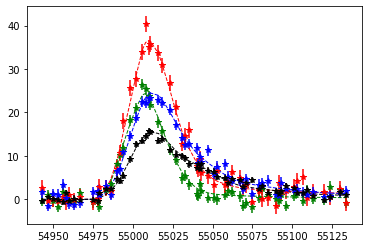

In [121]:

clr=['g','r','b','k']
for i in range(Nb):
    plt.errorbar(obs,fluxes[i],yerr=noises[i],fmt='%s*'%(clr[i]))
    plt.plot(obs, fluxI[i][0]+fluxI[i][1], lw=1.0, ls="--", c=clr[i])
    chisq=np.sum((fluxes[i]-(fluxI[i][0]+fluxI[i][1]))**2/noises[i]**2)
    print("band=%s, data points=%s, Chi^2=%s",bands[i],len(fluxes[i]),chisq)
    #plt.plot(obs, fluxI[i][1], lw=1.0, ls="dotted", c=clr[i])
plt.show()

In [122]:
print(mag,dt)
idx=np.argsort(dt); mu_ex=(mag[idx])[1]/(mag[idx])[0]; 
dt_ex=dt[idx][1]-dt[idx][0]
print("expected mu and dt=",mu_ex,dt_ex)

[1.8 3. ] [ 1.1 13.2]
expected mu and dt= 1.6666666666666665 12.1


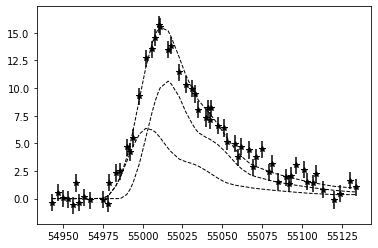

In [125]:
i=3
plt.errorbar(obs,fluxes[i],yerr=noises[i],fmt='%s*'%(clr[i]))
plt.plot(obs, fluxI[i][0]+fluxI[i][1], lw=1.0, ls="--", c=clr[i])
plt.plot(obs, fluxI[i][0], lw=1.0, ls="--", c=clr[i])
plt.plot(obs, fluxI[i][1], lw=1.0, ls="--", c=clr[i])


**I could see taht the lsst z-band images has some weired wiggly charecteristics after the maximum. I hope this is expected.**

In [123]:
out='Alex_sim_nobs_%s_fluc%s_t1_%s_mu_%s_%s_dt_%s_%s'%(nobs,fluc,t1,mag[0],mag[1],dt[0],dt[1])
print(out)


import sys
#sys.exit()
Nb=len(bands)

for j in range(Nb):
    band=bands[j]
    fout=out+band+'.txt'
    np.savetxt(fout,np.c_[obs, fluxes[j],noises[j],fluxI[j][0], fluxI[j][1]])
    

Alex_sim_nobs_60_fluc2_t1_60_mu_1.8_3.0_dt_1.1_13.2
